# EDA 
EDA goals are:
- Perfom data quality checks, such as missing values, duplicates
- Understand data types
- Understand data distributions(descriptive metrics, outliers, data balance)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List
from sklearn.preprocessing import StandardScaler
from utils import plot_multiple_lines, are_columns_indentical, find_indentical_columns

In [8]:
# Define the path to your Parquet file or directory
dataPath = "data.parquet"  # Adjust for single file or directory
# Read the Parquet data into a DataFrame
df = pd.read_parquet(dataPath)

In [4]:
df.head()

,col_0_numeric,col_1_numeric,col_2_numeric,col_3_numeric,col_4_numeric,col_5_numeric,col_6_numeric,col_7_numeric,col_8_numeric,col_9_numeric,...,col_318_numeric,col_319_numeric,col_320_numeric,col_321_numeric,col_322_numeric,col_323_numeric,col_324_numeric,col_325_numeric,label,col_327_other
0,270.983551,40.060154,NaN,NaN,0.476529,0.131972,NaN,NaN,NaN,NaN,...,NaN,21.428572,7.142857,0.0,NaN,NaN,258.870544,NaN,Continue,2024-04-28 02:04:00.944030
1,NaN,7.867676,NaN,NaN,17.629303,26.530045,NaN,NaN,NaN,NaN,...,64.812294,85.714287,78.571426,0.0,-2.163792,80.260124,-151.599518,53.983444,Continue,2024-04-28 02:12:55.364655
2,NaN,7.867676,NaN,NaN,17.629303,26.530045,NaN,NaN,25.218269,96.353047,...,64.812294,85.714287,78.571426,0.0,-2.163792,80.260124,-151.599518,53.983444,Continue,2024-04-28 02:12:55.364655
3,NaN,7.867676,NaN,NaN,17.629303,26.530045,NaN,NaN,828.416504,1989.064141,...,64.812294,85.714287,78.571426,0.0,-2.163792,80.260124,-151.599518,53.983444,Continue,2024-04-28 02:12:55.364655
4,NaN,7.867676,NaN,NaN,17.629303,26.530045,NaN,NaN,71.380898,300.839694,...,64.812294,85.714287,78.571426,0.0,-2.163792,80.260124,-151.599518,53.983444,Continue,2024-04-28 02:12:55.364655


In [5]:
df.shape

(11533904, 328)

In [18]:
df.label.value_counts() / df.shape[0]

label
Continue       0.98555
Interrupted    0.01445
Name: count, dtype: float64

In [5]:
df.dtypes.value_counts()

float32           208
float64           115
int64               2
category            1
object              1
datetime64[us]      1
Name: count, dtype: int64

In [4]:
df.select_dtypes(include=["int64", "category", "object"]).head(15)

,col_14_other,col_15_string,col_16_string,label
0,ap-south-1,0,0,Continue
1,us-west-2,1,1,Continue
2,us-west-2,2,2,Continue
3,us-west-2,3,3,Continue
4,us-west-2,4,4,Continue
5,us-west-2,5,5,Continue
6,us-west-2,4,4,Continue
7,us-west-2,4,4,Continue
8,us-west-2,6,6,Continue
9,us-west-2,7,7,Continue


In [19]:
len(df.col_16_string.value_counts())

1854

In [20]:
len(df.col_15_string.value_counts())

602

In [9]:
df["timestamp_rounded"] = df["col_327_other"].dt.round("min")
df_clean0 = df.drop(["col_327_other"], axis=1).drop_duplicates(
    subset=[
        "timestamp_rounded",
        "label",
        "col_14_other",
        "col_15_string",
        "col_16_string",
    ]
)
df_clean0.shape

(1282844, 328)

In [6]:
1282844 / 11533904

0.1112237452297158

In [35]:
df_clean0.label.value_counts() / df_clean0.shape[0]

label
Continue       0.935907
Interrupted    0.064093
Name: count, dtype: float64

In [13]:
scaler = StandardScaler()
numeric_df = df_clean0.select_dtypes(include=["int64", "float64", "float32"])
scaled_features = scaler.fit_transform(numeric_df)


: 

In [ ]:
scaled_df = pd.DataFrame(scaled_features, columns=numeric_df.columns, index=numeric_df.index)
df_stats = scaled_df.describe()

In [12]:
missing_values_per_column = df_clean0.isnull().sum() / df_clean0.shape[0]

In [33]:
max(missing_values_per_column)

0.9942853534802361

<Axes: >

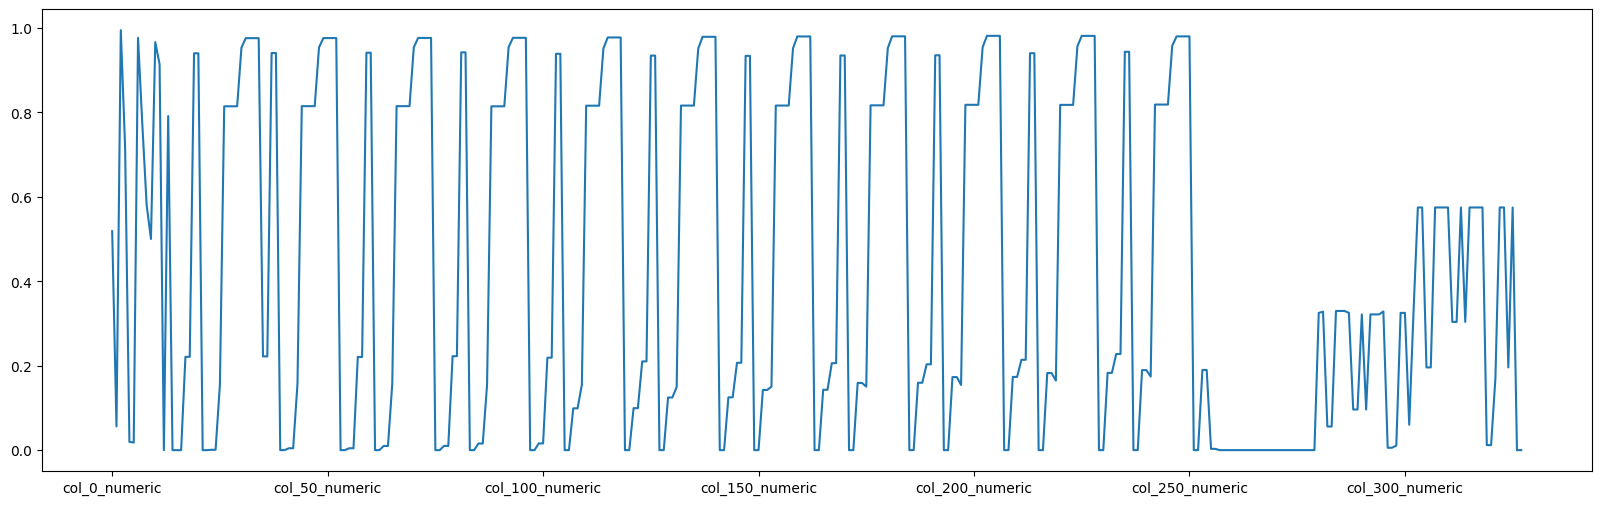

In [13]:
missing_values_per_column.plot(kind="line", figsize=(20, 6))

<Axes: >

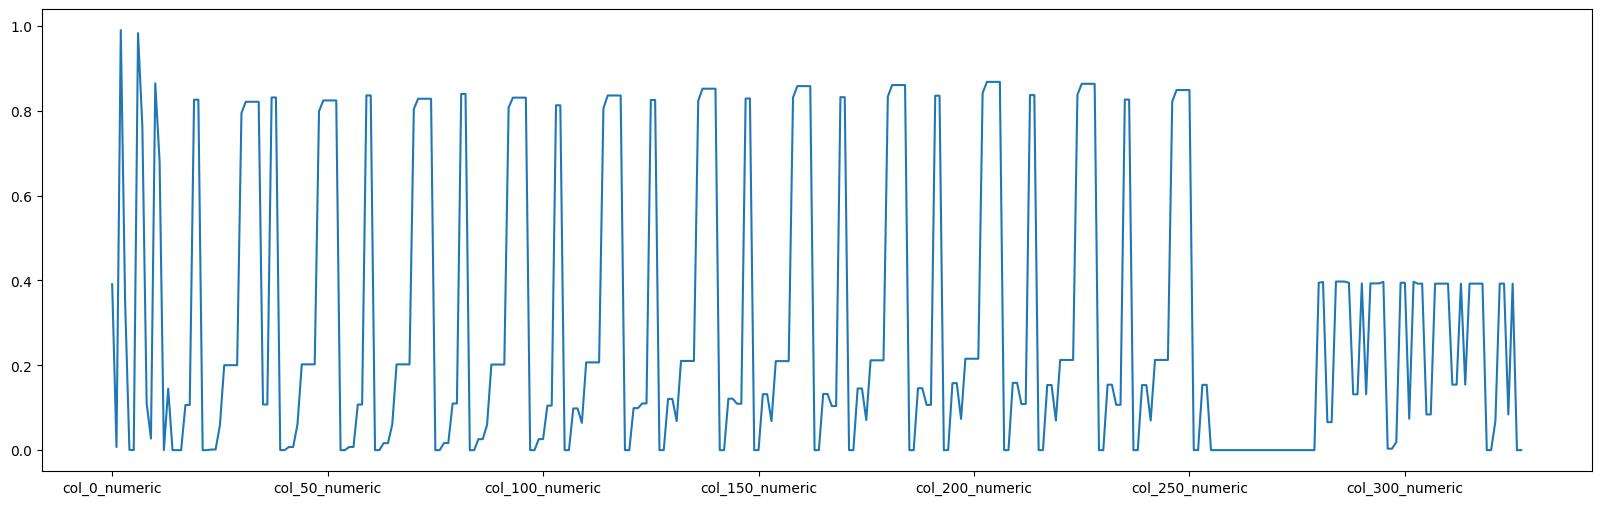

In [15]:
df_interrupted = df_clean0[df_clean0["label"] == "Interrupted"]
df_interrupted_missings = df_interrupted.isnull().sum() / df_interrupted.shape[0]
df_interrupted_missings.plot(kind="line", figsize=(20, 6))

In [16]:
df_continue = df_clean0[df_clean0["label"] == "Continue"]
df_continue_missings = df_continue.isnull().sum() / df_continue.shape[0]
df_diff_missings = df_continue_missings - df_interrupted_missings

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(-50.0, 0, 'col_216_numeric'),
  Text(0.0, 0, 'col_13_numeric'),
  Text(50.0, 0, 'col_310_numeric'),
  Text(100.0, 0, 'col_138_numeric'),
  Text(150.0, 0, 'col_59_numeric'),
  Text(200.0, 0, 'col_187_numeric'),
  Text(250.0, 0, 'col_98_numeric'),
  Text(300.0, 0, 'col_78_numeric'),
  Text(350.0, 0, '')])

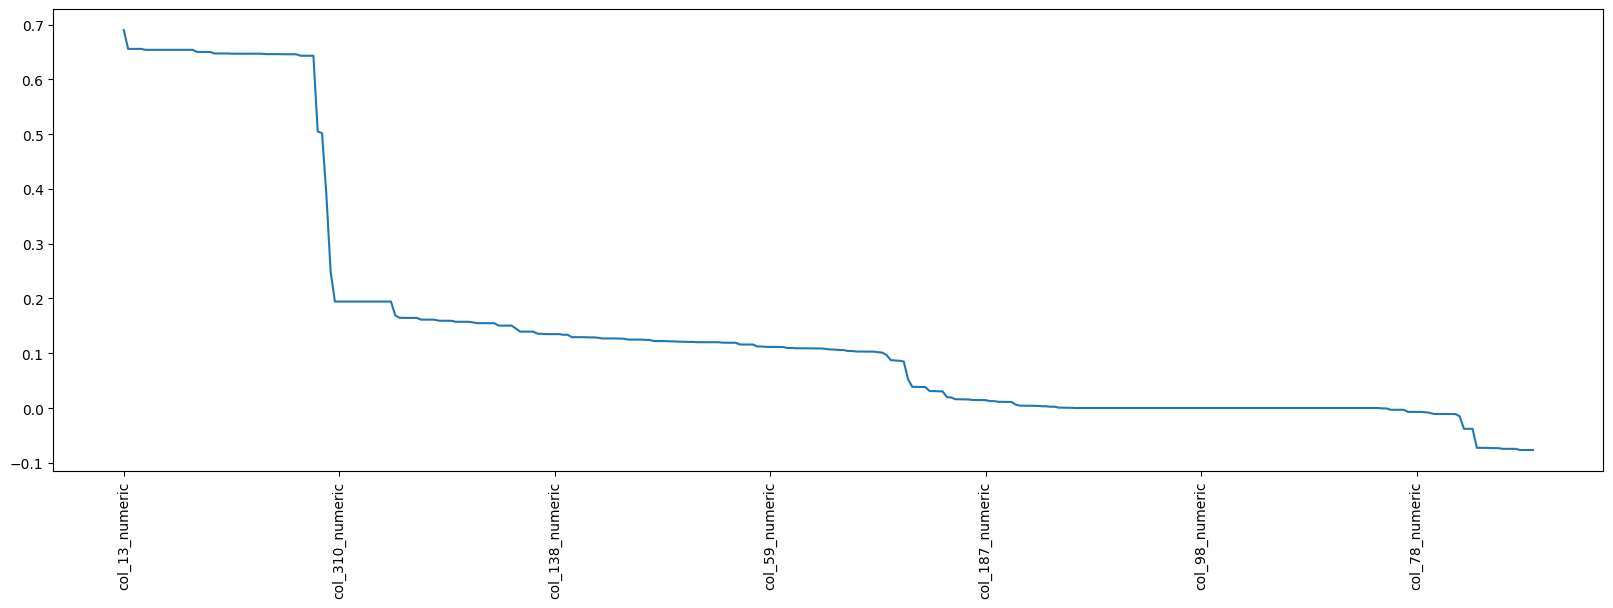

In [21]:
df_diff_missings.sort_values(ascending=False).plot(kind="line", figsize=(20, 6))
# ax.set_xticks(list(df_diff_missings.index))
# ax.set_xticklabels(df_diff_missings.index, rotation=90)
plt.xticks(rotation=90)

In [ ]:
df_stats_t = (
    pd.DataFrame(df_stats)
    .T.drop(["count", "max"], axis=1)
    .drop("timestamp_rounded", axis=0)
    .sort_values(["mean", "50%"], ascending=False)
)

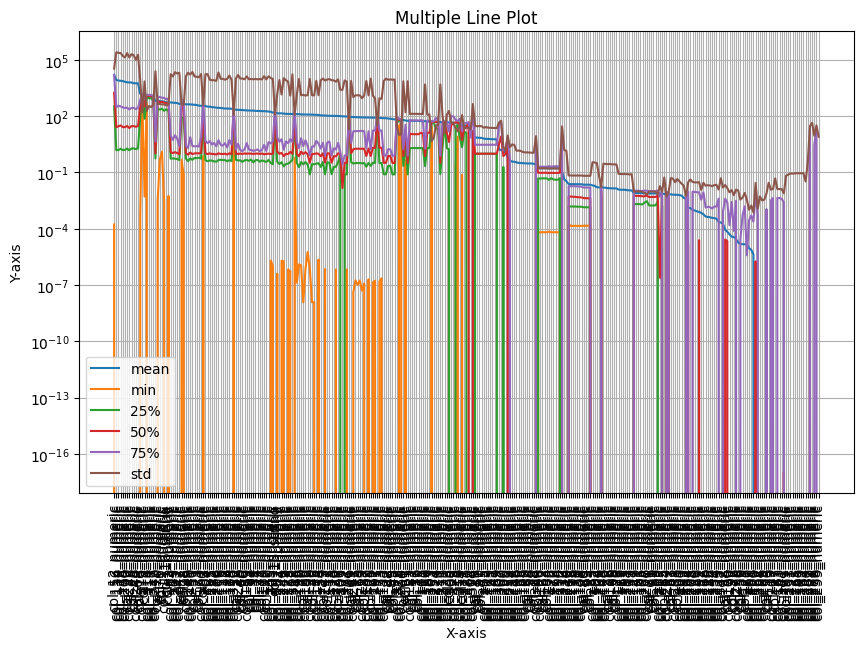

In [ ]:
plot_multiple_lines(
    data=df_stats_t,
    x_col=list(df_stats_t.index),
    y_cols=list(df_stats_t.columns),
    title="Multiple Line Plot",
    xlabel="X-axis",
    ylabel="Y-axis",
    rotation=90,
)

<Figure size 1400x1400 with 0 Axes>

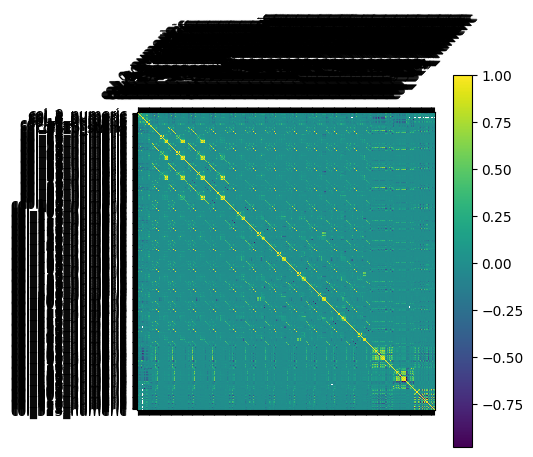

In [32]:
df_numeric = df_clean0.select_dtypes(include=["number"])
correlation = df_numeric.corr()

# Create heatmap
plt.figure(figsize=(14, 14))
plt.matshow(correlation)
# Add colorbar
plt.colorbar()

# Set labels for each cell (optional)
# for i in range(len(correlation.columns)):
#   for j in range(len(correlation.columns)):
#     plt.text(i, j, f"{correlation.iloc[i, j]:.2f}", ha='center', va='center')

# Set ticks and labels for axes
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation.columns)), correlation.columns)

plt.show()

In [42]:
# Create a mask to ignore the upper triangle and diagonal elements
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Use the mask to set the upper triangle and diagonal to NaN
tri_df = correlation.mask(mask)

# Find columns with correlation greater than 0.99
highly_correlated_pairs = tri_df[tri_df > 0.99].stack().reset_index()
highly_correlated_pairs.columns = ["Column1", "Column2", "Correlation"]

Columns with correlation greater than 0.99: {'col_225_numeric', 'col_62_numeric', 'col_89_numeric', 'col_27_numeric', 'col_64_numeric', 'col_306_numeric', 'col_26_numeric', 'col_160_numeric', 'col_303_numeric', 'col_31_numeric', 'col_322_numeric', 'col_40_numeric', 'col_248_numeric', 'col_159_numeric', 'col_42_numeric', 'col_204_numeric', 'col_50_numeric', 'col_201_numeric', 'col_155_numeric', 'col_45_numeric', 'col_203_numeric', 'col_182_numeric', 'col_115_numeric', 'col_94_numeric', 'col_181_numeric', 'col_133_numeric', 'col_84_numeric', 'col_86_numeric', 'col_44_numeric', 'col_220_numeric', 'col_29_numeric', 'col_290_numeric', 'col_154_numeric', 'col_223_numeric', 'col_49_numeric', 'col_93_numeric', 'col_66_numeric', 'col_32_numeric', 'col_138_numeric', 'col_52_numeric', 'col_132_numeric', 'col_221_numeric', 'col_71_numeric', 'col_22_numeric', 'col_110_numeric', 'col_176_numeric', 'col_24_numeric', 'col_247_numeric', 'col_226_numeric', 'col_137_numeric', 'col_305_numeric', 'col_198_

In [51]:
corr_columns_drop = list(set(highly_correlated_pairs["Column1"]))
df_clean1 = df_clean0.drop(corr_columns_drop, axis=1)

In [53]:
df_clean1.to_parquet("data_clean1.parquet", engine="pyarrow")

## Findings

- The data set is an event table where event is continious or interrapted connection. Most of the attributes in the data set are numeric type. The ones which are not numeric are:
    - datime of event. This attribute was rounded to minutes to remove duplicates.
    - 2 stirng type attributes which might represend indication of different users or/and virtual machines, etc.
    - time zone attribute.

- Data cleaning. Data was cleaned by rouding time be minutes and removing dublicated rows by subset of categorical attributes since the mail goal is to predict interrupted connections so intteruption and event before intterption should be the most valuable.
- There no duplicated collums in the dataset, however, some collumns have very high or even perfect cocelation equal to one. This indicates multicollinearity which is problem for potentianl model explainability. Highly correlated collumns were removed from dataset.
- Missing values. There are a lot of missing values in dataset, some attributes reaching over 99% of missings. The differences across missing values by event type is analysed to chech if some missing values can be related to interruption. 
- Data balanse. The dataset is highly inbalance be event time. The interaptions consist 1.4% of orinal dataset and 6.4% of cleaned dataset.